# Clean jupyter notebooks (remove output)
---

### Import Modules

In [1]:
import os
print(os.getcwd())
import sys

from pathlib import Path
from json import dump, load
from shutil import copyfile

import plotly.graph_objs as go
import pandas as pd

# #########################################################
from jupyter_modules.jupyter_methods import (
    clean_ipynb,
    get_ipynb_notebook_paths,
    )

from jupyter_modules.jupyter_methods import get_df_jupyter_notebooks

/home/raulf2012/Dropbox/01_norskov/00_git_repos/PROJ_IrOx_OER/scripts/repo_file_operations


### Script Inputs

In [2]:
# dry_run = True
dry_run = False

In [3]:
PROJ_irox_path = os.environ["PROJ_irox_oer"]
df = get_df_jupyter_notebooks(path=PROJ_irox_path)

# Removing this notebook from dataframe
df = df[df.file_name != "clean_jup.ipynb"]

# Removing notebooks that are in not relevent places
df = df[df.in_bad_place == False]

In [4]:
df.head()

,file_path,file_path_short,file_name,file_ext,file_size__b,file_size__mb,in_bad_place,py_file_present,file_path_short_no_ext
21,/home/raulf2012/Dropbox/01_norskov/00_git_repo...,__misc__/00_group_meeting/group_meeting.ipynb,group_meeting.ipynb,ipynb,7525,0.007525,False,True,__misc__/00_group_meeting/group_meeting
22,/home/raulf2012/Dropbox/01_norskov/00_git_repo...,collated_plots.ipynb,collated_plots.ipynb,ipynb,4071,0.004071,False,True,collated_plots
23,/home/raulf2012/Dropbox/01_norskov/00_git_repo...,dft_workflow/__misc__/finding_nonconstrained_m...,find_unconstr_slabs.ipynb,ipynb,3239,0.003239,False,True,dft_workflow/__misc__/finding_nonconstrained_m...
24,/home/raulf2012/Dropbox/01_norskov/00_git_repo...,dft_workflow/bin/anal_job_out.ipynb,anal_job_out.ipynb,ipynb,11843,0.011843,False,True,dft_workflow/bin/anal_job_out
25,/home/raulf2012/Dropbox/01_norskov/00_git_repo...,dft_workflow/bin/delete_unsub_jobs.ipynb,delete_unsub_jobs.ipynb,ipynb,32869,0.032869,False,True,dft_workflow/bin/delete_unsub_jobs


# Listing notebooks without paired python script

In [5]:
df_tmp = df.sort_values("file_path")
df_tmp[df_tmp.py_file_present == False].style.set_properties(**{"text-align": "left"})

df_i = df_tmp[df_tmp.py_file_present == False]

print(
    "Number of jupyter notebooks without paired .py file:",
    "\n",
    df_i.shape[0],
    "\n",
    sep="")

tmp = df_i.file_path_short.tolist()
# tmp1 = [print(i) for i in tmp]

print(40 * "-")
for i in tmp:
    if "old" in i:
        continue

    print(i)

Number of jupyter notebooks without paired .py file:
1

----------------------------------------


# Cleaning notebooks larger than 0.1 MB in size

In [6]:
df_big = df[df.file_size__mb > 0.04]

print(
    "Number of notebooks to clean:", df_big.shape[0],
    "\n",
    sep="")


# for ind_i, row_i in df_big.iloc[0:1].iterrows():
for ind_i, row_i in df_big.iterrows():
    file_path_i = row_i.file_path
 
    print("file_path_i:", file_path_i)
    if not dry_run:
        clean_ipynb(file_path_i, True)

Number of notebooks to clean:2

file_path_i: /home/raulf2012/Dropbox/01_norskov/00_git_repos/PROJ_IrOx_OER/dft_workflow/job_analysis/compare_magmoms/sandbox.ipynb
file_path_i: /home/raulf2012/Dropbox/01_norskov/00_git_repos/PROJ_IrOx_OER/workflow/creating_slabs/sandbox.ipynb


# Plotting file size, ordered high to low

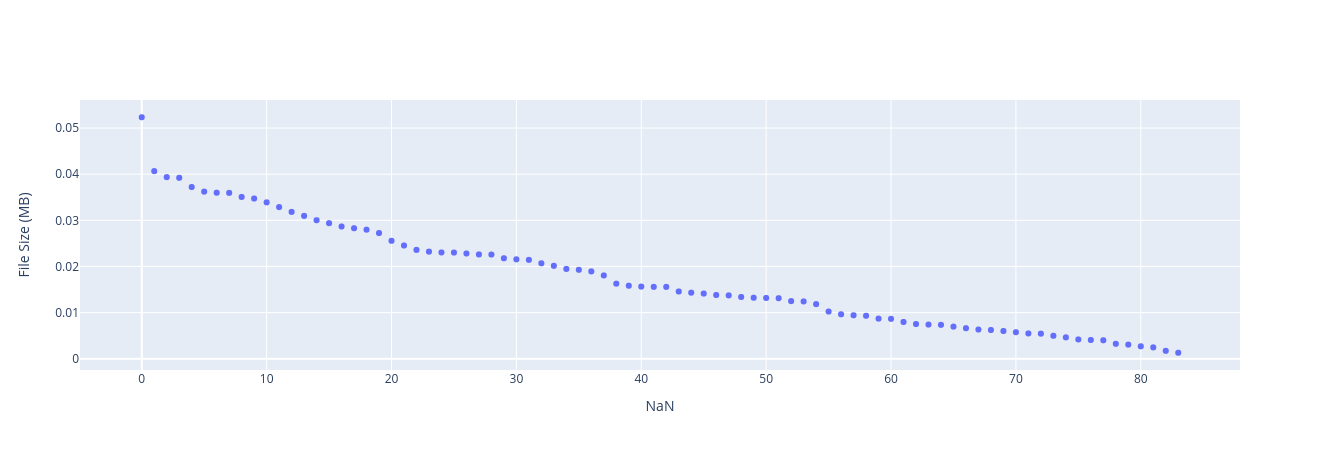

In [12]:
df = df.sort_values("file_size__mb", ascending=False)

# #########################################################
layout = go.Layout(
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(text="NaN"),
        ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(text="File Size (MB)"),
        ),
    )

# #########################################################
trace = go.Scatter(
    # x=df.index.tolist(),
    y=df.file_size__mb.tolist(),
    mode="markers",
    )
data = [trace]

fig = go.Figure(data=data, layout=layout)
fig.show()

In [9]:
# import chart_studio.plotly as py
# import plotly.graph_objs as go

# import os

# x_array = [0, 1, 2, 3]
# y_array = [0, 1, 2, 3]


# trace = go.Scatter(
#     x=x_array,
#     y=y_array,
#     mode="markers",
#     opacity=0.8,
#     marker=dict(

#         symbol="circle",
#         color='LightSkyBlue',

#         opacity=0.8,

#         # color=z,
#         colorscale='Viridis',
#         colorbar=dict(thickness=20),

#         size=20,
#         line=dict(
#             color='MediumPurple',
#             width=2
#             )
#         ),

#     line=dict(
#         color="firebrick",
#         width=2,
#         dash="dot",
#         ),

#     error_y={
#         "type": 'data',
#         "array": [0.4, 0.9, 0.3, 1.1],
#         "visible": True,
#         },

#     )

# data = [trace]

# fig = go.Figure(data=data)
# fig.show()

In [10]:
# # #########################################################
# data_dict_list = []
# # #########################################################
# dirs_list = get_ipynb_notebook_paths(PROJ_irox_path=PROJ_irox)
# for file_i in dirs_list:
#     data_dict_i = dict()

#     file_size_i = Path(file_i).stat().st_size
#     file_size_mb_i =  file_size_i / 1000 / 1000
#     file_name_i = file_i.split("/")[-1]
#     file_path_short_i = file_i[len(PROJ_irox) + 1:]

#     # #####################################################
#     in_bad_place = False
#     if ".virtual_documents" in file_i:
#         in_bad_place = True

#     # #####################################################
#     if "." in file_name_i:
#         ext_i = file_name_i.split(".")[-1]
#     else:
#         ext_i = "NaN"

#     # #####################################################
#     py_file_i = os.path.join(
#         "/".join(file_i.split("/")[0:-1]),
#         file_name_i.split(".")[0] + ".py"
#         )

#     my_file = Path(py_file_i)
#     if my_file.is_file():
#         py_file_present_i = True
#     else:
#         py_file_present_i = False


#     # #####################################################
#     data_dict_i["file_path"] = file_i
#     data_dict_i["file_path_short"] = file_path_short_i
#     data_dict_i["file_name"] = file_name_i
#     data_dict_i["file_ext"] = ext_i
#     data_dict_i["file_size__b"] = file_size_i
#     data_dict_i["file_size__mb"] = file_size_mb_i
#     data_dict_i["in_bad_place"] = in_bad_place
#     data_dict_i["py_file_present"] = py_file_present_i
#     # data_dict_i[""] = 
#     # #####################################################
#     data_dict_list.append(data_dict_i)
#     # #####################################################

# # #########################################################
# df = pd.DataFrame(data_dict_list)
# df = df.sort_values("file_size__b", ascending=False)
# df = df.reset_index(drop=True)

# # Removing this notebook from dataframe
# df = df[df.file_name != "clean_jup.ipynb"]

# # Removing notebooks that are in not relevent places
# df = df[df.in_bad_place == False]
# # #########################################################